### Desafío - Expansiones basales
- Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
  - El desafío se debe desarrollar de manera Individual.
  - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Expansiones basales.

### Descripción
- Una aplicación interesante de los modelos predictivos es poder predecir propiedades
de materiales compuestos a partir de diferentes combinaciones en el proceso y
creación de estos.
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de
materiales con los que se hace la mezcla de concreto.
- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir
fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que
buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza
compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere
estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de
las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la
librería pyGAM.



In [1]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, s
# Modulo de funciones especiales y graficos
import func as gfx

# Otras librerias, configuraciones e instancias
labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Datasets/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de Concrete compressive strength(MPa,
megapascals)
- Los nombres de las variables son muy poco amigables, dado que contienen
espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se
obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos.


In [3]:
# Limpieza de cararcteres en nombre de las variables
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))

In [4]:
# Cambio de nombres a variables
df = df.rename(columns = {'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age_day,concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Inspeccion de el tipo de datos
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age_day               int64
concrete            float64
dtype: object

In [6]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 1030
Numero de columnas: 9


<AxesSubplot:>

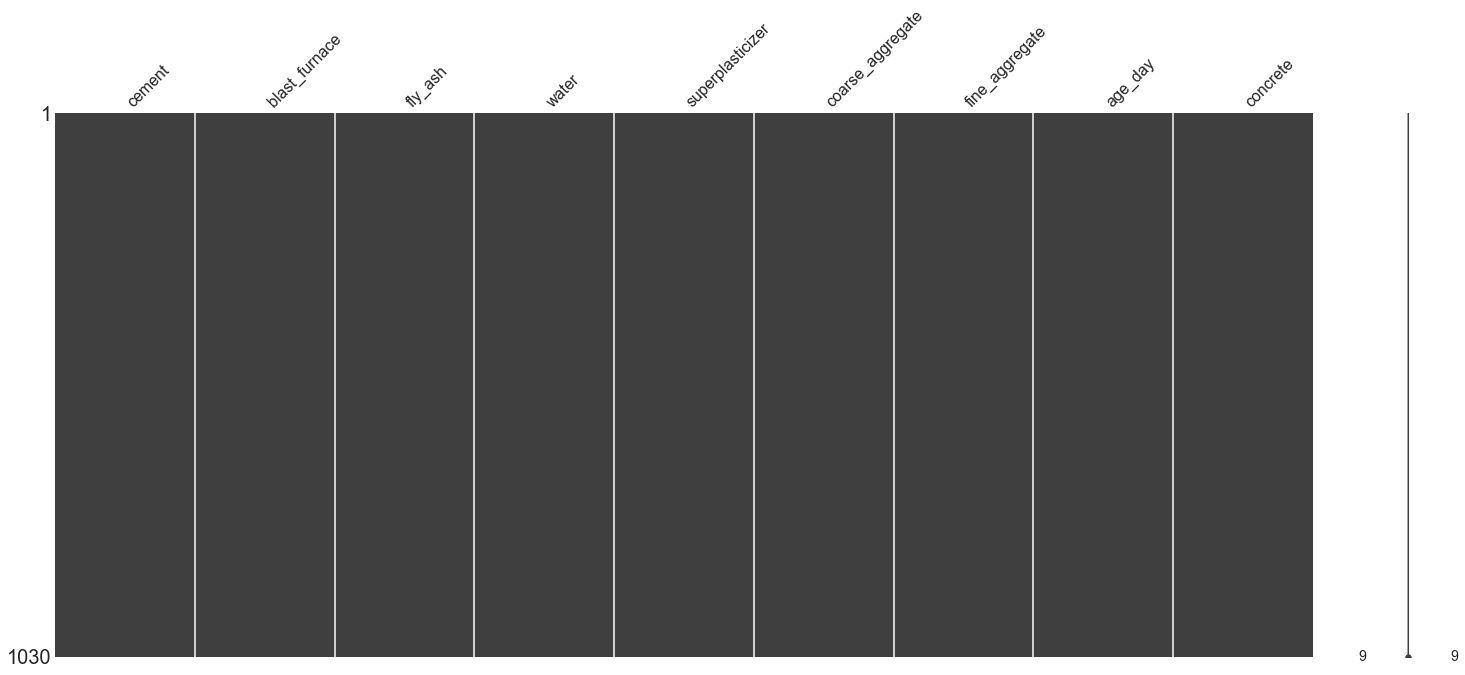

In [7]:
msngo.matrix(df)

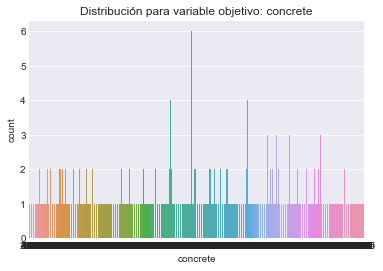

In [8]:
# Visualizacion distribucion vector objetivo
sns.countplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: concrete')
plt.show()

In [9]:
gfx.summary_drop(df)

,tipo,nulos,nulos_porces,ceros,ceros_porces,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age_day,int64,0,0.0,0,0.000000,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,49.000,-66.5000,129.5000,59
cement,float64,0,0.0,0,0.000000,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,157.625,-44.0625,586.4375,0
blast_furnace,float64,0,0.0,471,0.457282,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,142.950,-214.4250,357.3750,2
fly_ash,float64,0,0.0,566,0.549515,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,118.300,-177.4500,295.7500,0
water,float64,0,0.0,0,0.000000,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,27.100,124.2500,232.6500,9
superplasticizer,float64,0,0.0,379,0.367961,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,10.200,-15.3000,25.5000,10
coarse_aggregate,float64,0,0.0,0,0.000000,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,97.400,785.9000,1175.5000,0
fine_aggregate,float64,0,0.0,0,0.000000,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,93.050,591.3750,963.5750,5
concrete,float64,0,0.0,0,0.000000,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,22.425,-9.9275,79.7725,4


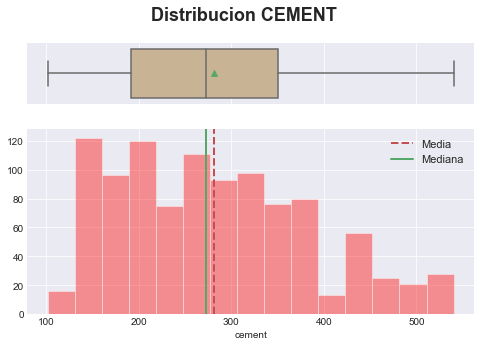

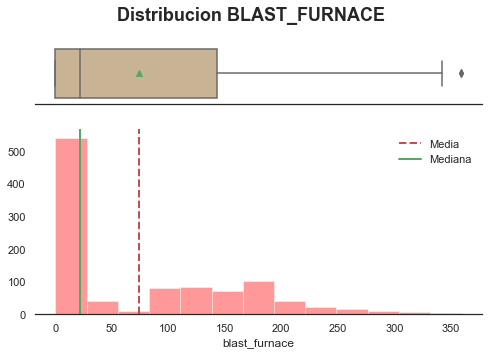

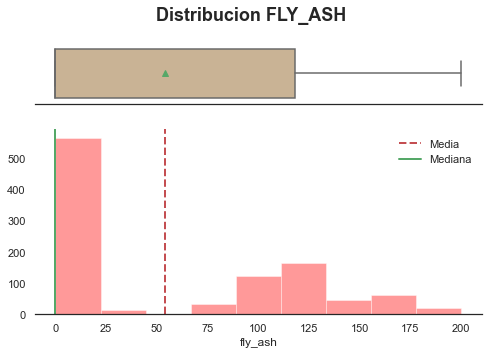

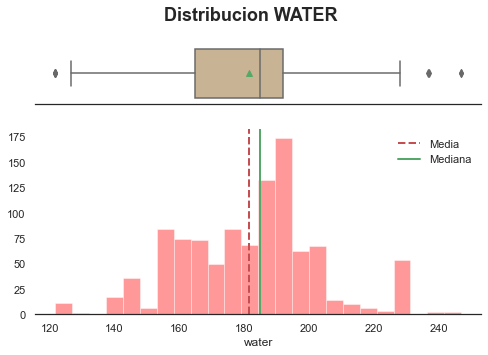

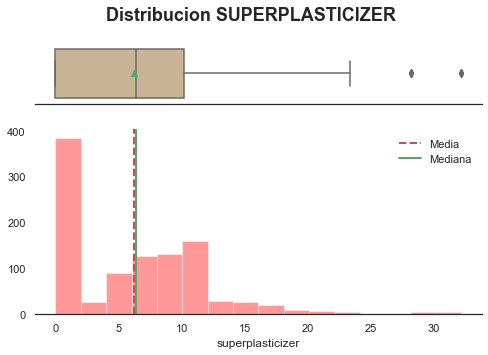

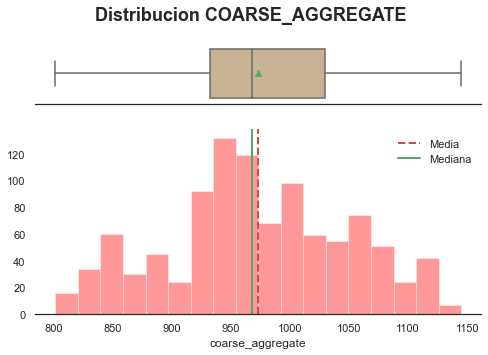

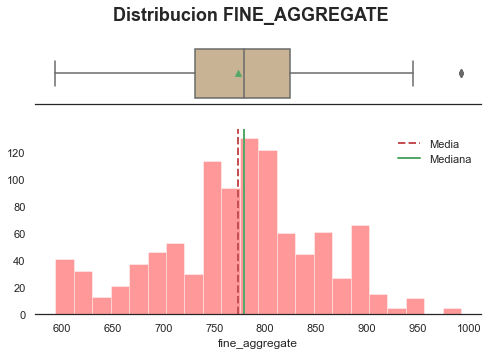

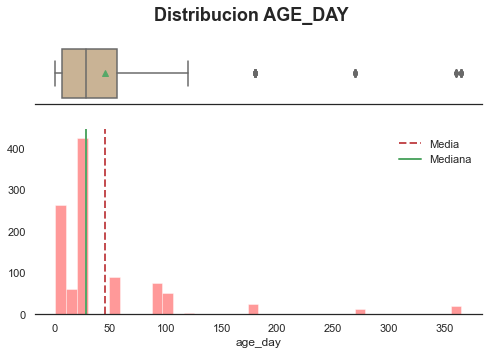

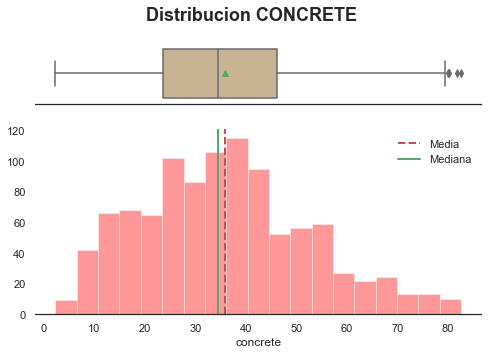

In [10]:
name_vars = ['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age_day', 'concrete']

for i in range(len(name_vars)):
        gfx.dist_box(df[name_vars[i]])

### Ejercicio 3: Modelo
- En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional
a esto, importe las métricas de desempeño asociadas.

- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper
parámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un
logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de
desempeño.


In [18]:
sub = df[['cement', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'concrete']]

In [19]:
#Dividimos en conjunto de entrenamiento y validacion
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete'], test_size = .33, random_state = 15820)
# Ajustamos el estandarizador al conjunto de entrrenamiento
scaler = StandardScaler().fit(X_train_pre)

In [20]:
# Con el estandarizador ajustado sobre el conjunto de entrenamiento, transformamos el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)

In [21]:
lams = np.logspace(-3, 3, 3)

In [22]:
lams = [lams]*len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [23]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5), fit_intercept = True)

In [27]:
gam.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 729) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:01:17
  0% (3 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:57
  0% (5 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:52
  0% (7 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:49
  1% (9 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:48
  1% (10 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:48
  1% (12 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:47
  1% (14 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:47
  2% (16 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:46
  2% (18 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:46
  2% (19 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:46
  2% (21 of 729) |                      

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [28]:
X_train.columns

Index(['cement', 'water', 'superplasticizer', 'coarse_aggregate',
       'fine_aggregate', 'concrete'],
      dtype='object')

In [29]:
gam.statistics_.keys()

dict_keys(['n_samples', 'm_features', 'edof_per_coef', 'edof', 'scale', 'cov', 'se', 'AIC', 'AICc', 'pseudo_r2', 'GCV', 'UBRE', 'loglikelihood', 'deviance', 'p_values'])

In [30]:
gam.lam

[[1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [1000.0]]

In [31]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.8019
Link Function:                     IdentityLink Log Likelihood:                    -4.4817147624672877e+17
Number of Samples:                          690 AIC:                                 8.963429524934575e+17
                                                AICc:                                8.963429524934575e+17
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

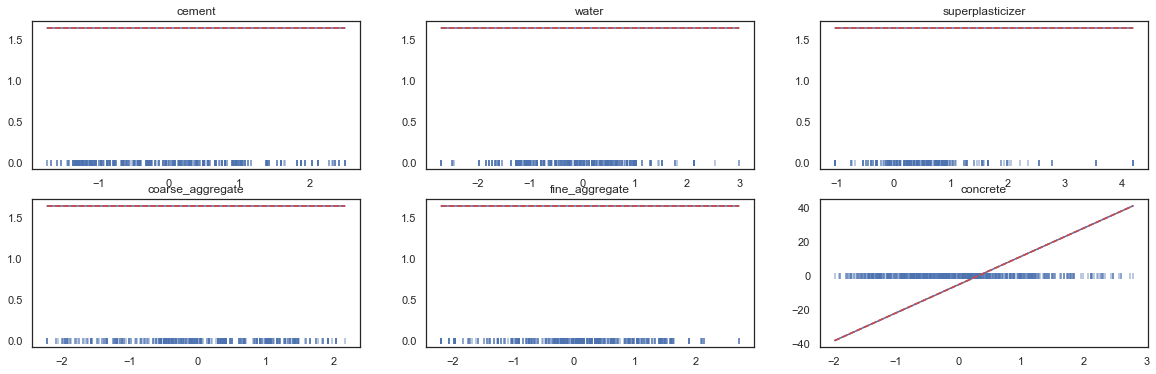

In [32]:
fig, axs = plt.subplots(2,3, figsize =(20,6))

titles = X_train.columns

for i, ax in enumerate (axs.flatten()):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX))
        ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])

In [33]:
new_gam = LinearGAM(lam = 1e6).fit(X_train, y_train)

In [34]:
def report_metrics(model, x_test, y_test):
        preds = model.predict(x_test)
        print(f'''
        Test R2: {r2_score(y_test, preds)}
        Test MSE: {mean_squared_error(y_test, preds)}
        Test Median Absolute Error: {median_absolute_error(y_test, preds)}''')

In [35]:
print(f'Metricas para el primer modelo entrenado con lambda: {gam.lam}\n')
report_metrics(gam, X_test, y_test)


Metricas para el primer modelo entrenado con lambda: [[1000.0], [1000.0], [1000.0], [1000.0], [1000.0], [1000.0]]


        Test R2: 1.0
        Test MSE: 8.200054402539111e-16
        Test Median Absolute Error: 1.7139264230081608e-08


In [36]:
print(f'Metricas para el segundo modelo entrenado con lambda: {new_gam.lam}\n')
report_metrics(new_gam, X_test, y_test)

Metricas para el segundo modelo entrenado con lambda: [[1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0]]


        Test R2: 1.0
        Test MSE: 6.558389918428976e-16
        Test Median Absolute Error: 1.894126100410176e-08


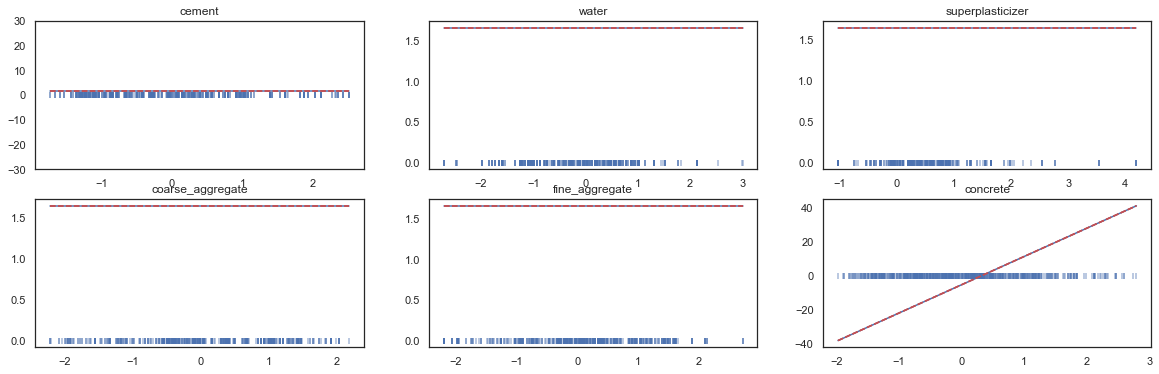

In [37]:
fig, axs = plt.subplots(2,3, figsize =(20,6))

titles = X_train.columns

for i, ax in enumerate (axs.flatten()):
        XX = new_gam.generate_X_grid(term = i)
        ax.plot(XX[:, i], new_gam.partial_dependence(term = i, X = XX))
        ax.plot(XX[:, i], new_gam.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
        if i == 0:
                ax.set_ylim(-30,30)
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])